# Examining the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
ri = pd.read_csv("police.csv", nrows = 50000 ) # ilk 50000 satırı okuttuk

C:\Users\MADCAT\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
ri.shape

(50000, 26)

In [4]:
ri.head(5) 

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


# Dropping columns

In [5]:
ri.isnull().sum()

id                           0
state                        0
stop_date                    0
stop_time                    0
location_raw                 0
county_name              50000
county_fips              50000
fine_grained_location    50000
police_department            0
driver_gender             1990
driver_age_raw            1971
driver_age                2208
driver_race_raw           1988
driver_race               1988
violation_raw             1988
violation                 1988
search_conducted             0
search_type_raw          47988
search_type              47988
contraband_found             0
stop_outcome              1988
is_arrested               1988
stop_duration             1988
out_of_state              2203
drugs_related_stop           0
district                     0
dtype: int64

In [6]:
ri.isnull().sum() / ri.shape[0] * 100 

id                         0.000
state                      0.000
stop_date                  0.000
stop_time                  0.000
location_raw               0.000
county_name              100.000
county_fips              100.000
fine_grained_location    100.000
police_department          0.000
driver_gender              3.980
driver_age_raw             3.942
driver_age                 4.416
driver_race_raw            3.976
driver_race                3.976
violation_raw              3.976
violation                  3.976
search_conducted           0.000
search_type_raw           95.976
search_type               95.976
contraband_found           0.000
stop_outcome               3.976
is_arrested                3.976
stop_duration              3.976
out_of_state               4.406
drugs_related_stop         0.000
district                   0.000
dtype: float64

In [7]:
ri.shape

(50000, 26)

In [8]:
ri.dropna(axis =1, how = "all", inplace = True )

In [9]:
# drop_cols = ["state"] I will drop it later
# ri.drop(drop_cols, axis = "columns", inplace=True)
# del ri["stop_date"]

In [10]:
ri.isnull().sum()

id                        0
state                     0
stop_date                 0
stop_time                 0
location_raw              0
police_department         0
driver_gender          1990
driver_age_raw         1971
driver_age             2208
driver_race_raw        1988
driver_race            1988
violation_raw          1988
violation              1988
search_conducted          0
search_type_raw       47988
search_type           47988
contraband_found          0
stop_outcome           1988
is_arrested            1988
stop_duration          1988
out_of_state           2203
drugs_related_stop        0
district                  0
dtype: int64

In [11]:
# ri.drop(["county_name", "county_fips"], axis = 1, inplace = True) # hepsi aynıu yerde olduğu için bu iki sütüna gerek yok attık

In [12]:
ri.head(2)

,id,state,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4


# Dropping rows

In [13]:
ri.isnull().sum()  # / ri.shape[0] * 100 

id                        0
state                     0
stop_date                 0
stop_time                 0
location_raw              0
police_department         0
driver_gender          1990
driver_age_raw         1971
driver_age             2208
driver_race_raw        1988
driver_race            1988
violation_raw          1988
violation              1988
search_conducted          0
search_type_raw       47988
search_type           47988
contraband_found          0
stop_outcome           1988
is_arrested            1988
stop_duration          1988
out_of_state           2203
drugs_related_stop        0
district                  0
dtype: int64

In [14]:
ri.dropna(subset = ["driver_gender"], axis = 0 , inplace = True)

In [15]:
ri.isnull().sum()

id                        0
state                     0
stop_date                 0
stop_time                 0
location_raw              0
police_department         0
driver_gender             0
driver_age_raw            0
driver_age              232
driver_race_raw           0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type_raw       45998
search_type           45998
contraband_found          0
stop_outcome              0
is_arrested               0
stop_duration             0
out_of_state            215
drugs_related_stop        0
district                  0
dtype: int64

In [16]:
ri.shape

(48010, 23)

# Fixing a data type

In [17]:
ri.dtypes

id                     object
state                  object
stop_date              object
stop_time              object
location_raw           object
police_department      object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race_raw        object
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type_raw        object
search_type            object
contraband_found         bool
stop_outcome           object
is_arrested            object
stop_duration          object
out_of_state           object
drugs_related_stop       bool
district               object
dtype: object

In [18]:
ri["is_arrested"].head()

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object

In [19]:
print(ri["is_arrested"].dtype)

object


In [20]:
ri = ri.astype({"is_arrested": "bool"})


In [21]:
ri["is_arrested"].value_counts(dropna=False)

False    45522
True      2488
Name: is_arrested, dtype: int64

# Combining object columns

In [22]:
idxasdate = ri["stop_date"]+" "+ri["stop_time"] # yeni index iki sütünun toplamı olacak
idxasdate

0        2005-01-02 01:55
1        2005-01-02 20:30
3        2005-01-04 12:55
4        2005-01-06 01:30
5        2005-01-12 08:05
               ...       
49995    2006-08-08 22:45
49996    2006-08-08 22:45
49997    2006-08-08 22:53
49998    2006-08-08 23:00
49999    2006-08-08 23:00
Length: 48010, dtype: object

In [23]:
pd.to_datetime(idxasdate)

0       2005-01-02 01:55:00
1       2005-01-02 20:30:00
3       2005-01-04 12:55:00
4       2005-01-06 01:30:00
5       2005-01-12 08:05:00
                ...        
49995   2006-08-08 22:45:00
49996   2006-08-08 22:45:00
49997   2006-08-08 22:53:00
49998   2006-08-08 23:00:00
49999   2006-08-08 23:00:00
Length: 48010, dtype: datetime64[ns]

In [24]:
ri["stop_datetime"] = pd.to_datetime(idxasdate)
ri["datetime"] = pd.to_datetime(idxasdate)

In [25]:
ri.head(2)

,id,state,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime,datetime
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,2005-01-02 01:55:00
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00,2005-01-02 20:30:00


In [26]:
print(ri.dtypes)

id                            object
state                         object
stop_date                     object
stop_time                     object
location_raw                  object
police_department             object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race_raw               object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type_raw               object
search_type                   object
contraband_found                bool
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
out_of_state                  object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
datetime              datetime64[ns]
dtype: object


In [27]:
ri.index

Int64Index([    0,     1,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            49990, 49991, 49992, 49993, 49994, 49995, 49996, 49997, 49998,
            49999],
           dtype='int64', length=48010)

In [28]:
ri.set_index("stop_datetime", inplace = True) # iki sütünu concatnate edip indexe atadık

In [29]:
ri.head()

,id,state,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,datetime
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
2005-01-02 20:30:00,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
2005-01-04 12:55:00,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
2005-01-06 01:30:00,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
2005-01-12 08:05:00,RI-2005-00006,RI,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00


In [30]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48010 entries, 2005-01-02 01:55:00 to 2006-08-08 23:00:00
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  48010 non-null  object        
 1   state               48010 non-null  object        
 2   stop_date           48010 non-null  object        
 3   stop_time           48010 non-null  object        
 4   location_raw        48010 non-null  object        
 5   police_department   48010 non-null  object        
 6   driver_gender       48010 non-null  object        
 7   driver_age_raw      48010 non-null  float64       
 8   driver_age          47778 non-null  float64       
 9   driver_race_raw     48010 non-null  object        
 10  driver_race         48010 non-null  object        
 11  violation_raw       48010 non-null  object        
 12  violation           48010 non-null  object        
 13  search_cond

# Examining traffic violations

In [31]:
ri["violation"].value_counts(dropna=False)

Speeding               36111
Moving violation        6522
Equipment               3022
Registration/plates     1463
Other                    892
Name: violation, dtype: int64

In [32]:
ri["violation"].size

48010

In [33]:
ri["violation"].value_counts().apply(lambda x: 100*x/ri["violation"].size)  # violation ları yüzde olarak gösterdik

Speeding               75.215580
Moving violation       13.584670
Equipment               6.294522
Registration/plates     3.047282
Other                   1.857946
Name: violation, dtype: float64

In [34]:
ri["violation"].value_counts(normalize= True) # display as proportion

Speeding               0.752156
Moving violation       0.135847
Equipment              0.062945
Registration/plates    0.030473
Other                  0.018579
Name: violation, dtype: float64

# Comparing violations by gender

In [35]:
df_male = ri[ri["driver_gender"] == "M"]
df_male.head();

In [36]:
df_female = ri[ri["driver_gender"] == "F"]
df_female.head();

In [37]:
# df_female.info() # to check if size correct or not

In [38]:
df_female["violation"].size

13309

In [39]:
df_female["violation"].value_counts().apply(lambda x: 100*x/df_female["violation"].size) 
# Count the violations committed by female drivers and express them as proportions.

Speeding               81.118040
Moving violation        9.903073
Equipment               4.560824
Registration/plates     2.757532
Other                   1.660530
Name: violation, dtype: float64

In [40]:
# df_male.info()   # to check if size if correct or not

In [41]:
df_male["violation"].size

34701

In [42]:
df_male["violation"].value_counts().apply(lambda x: 100*x/df_male["violation"].size)  
# Count the violations committed by male drivers and express them as proportions.

Speeding               72.951788
Moving violation       14.996686
Equipment               6.959454
Registration/plates     3.158410
Other                   1.933662
Name: violation, dtype: float64

# Comparing speeding outcomes by gender

In [43]:
df1_female = ri[(ri["violation"] == "Speeding")&(ri["driver_gender"] == "F")]
df1_male = ri[(ri["violation"] == "Speeding")&(ri["driver_gender"] == "M")]

df1_female.head(1)
#df1_female.info()
#df1_male.info()

,id,state,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,datetime
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-02-24 01:20:00,RI-2005-00016,RI,2005-02-24,01:20,Zone X3,200,F,1983.0,22.0,W,...,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X3,2005-02-24 01:20:00


In [44]:
df1_female["stop_outcome"].value_counts().apply(lambda x: 100*x/df1_female["stop_outcome"].size)
# df1_female["stop_outcome"].value_counts(normalize=True)

Citation            97.341608
Warning              1.296777
Arrest Driver        0.741015
N/D                  0.361245
Arrest Passenger     0.231567
No Action            0.027788
Name: stop_outcome, dtype: float64

In [45]:
df1_male["stop_outcome"].value_counts().apply(lambda x: 100*x/df1_male["stop_outcome"].size)
# df1_male["stop_outcome"].value_counts(normalize=True)

Citation            95.729804
Arrest Driver        2.622951
Warning              1.066561
N/D                  0.339720
Arrest Passenger     0.201462
No Action            0.039502
Name: stop_outcome, dtype: float64

C:\Users\MADCAT\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

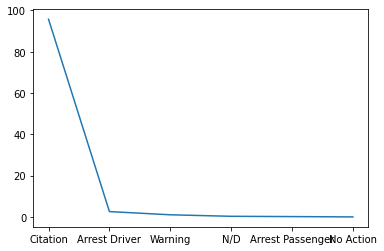

In [46]:
df1_male["stop_outcome"].value_counts().apply(lambda x: 100*x/df1_male["stop_outcome"].size).plot()

C:\Users\MADCAT\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

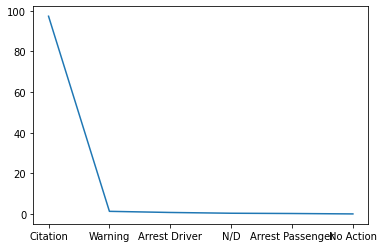

In [47]:
df1_female["stop_outcome"].value_counts().apply(lambda x: 100*x/df1_female["stop_outcome"].size).plot()

# Calculating the search rate

In [48]:
ri["search_conducted"].dtype  
# Check the data type of search_conducted to confirm that it's a Boolean Series.

dtype('bool')

In [49]:
a = ri["search_conducted"].value_counts()
a

False    45998
True      2012
Name: search_conducted, dtype: int64

In [50]:
b = ri["search_conducted"].value_counts().apply(lambda x: 100*x/ri["search_conducted"].size)
b  # Calculate the search rate by counting the Series values and expressing them as proportions.

False    95.809206
True      4.190794
Name: search_conducted, dtype: float64

In [51]:
resultdf = pd.DataFrame(pd.concat([a,b]))
resultdf.index = ["False_freq","True_freq","False_Percentage","True_Percentage"]
resultdf.T

,False_freq,True_freq,False_Percentage,True_Percentage
search_conducted,45998.0,2012.0,95.809206,4.190794


In [52]:
a = ri["search_conducted"].mean() * 100
a

4.19079358466986

In [53]:
ri["search_conducted"].describe() # ? 

count     48010
unique        2
top       False
freq      45998
Name: search_conducted, dtype: object

In [54]:
if resultdf.loc["True_Percentage"][0] == a:
    print("Proportion equal to mean")
# Calculate the search rate by taking the mean of the Series. (It should match the proportion of True values calculated above.)

Proportion equal to mean


# Comparing search rates by gender

# 1

In [55]:
sample_female = ri[ri["driver_gender"] == "F"]

In [56]:
sample_female.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13309 entries, 2005-02-24 01:20:00 to 2006-08-08 23:00:00
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  13309 non-null  object        
 1   state               13309 non-null  object        
 2   stop_date           13309 non-null  object        
 3   stop_time           13309 non-null  object        
 4   location_raw        13309 non-null  object        
 5   police_department   13309 non-null  object        
 6   driver_gender       13309 non-null  object        
 7   driver_age_raw      13309 non-null  float64       
 8   driver_age          13239 non-null  float64       
 9   driver_race_raw     13309 non-null  object        
 10  driver_race         13309 non-null  object        
 11  violation_raw       13309 non-null  object        
 12  violation           13309 non-null  object        
 13  search_cond

In [57]:
a = sample_female["search_conducted"].value_counts()

In [58]:
b = sample_female["search_conducted"].value_counts().apply(lambda x: 100*x/sample_female["search_conducted"].size) # manual solution

In [59]:
b = sample_female["search_conducted"].value_counts(normalize=True) # built in solution
b

False    0.982193
True     0.017807
Name: search_conducted, dtype: float64

In [60]:
resultdf = pd.DataFrame(pd.concat([a,b]))
resultdf.index = ["False_freq","True_freq","False_Percentage","True_Percentage"]
resultdf.T

,False_freq,True_freq,False_Percentage,True_Percentage
search_conducted,13072.0,237.0,0.982193,0.017807


In [61]:
sample_female["search_conducted"].mean()*100

1.7807498685100307

# 2

In [62]:
sample_male = ri[ri["driver_gender"] == "M"]

In [63]:
sample_male.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34701 entries, 2005-01-02 01:55:00 to 2006-08-08 23:00:00
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  34701 non-null  object        
 1   state               34701 non-null  object        
 2   stop_date           34701 non-null  object        
 3   stop_time           34701 non-null  object        
 4   location_raw        34701 non-null  object        
 5   police_department   34701 non-null  object        
 6   driver_gender       34701 non-null  object        
 7   driver_age_raw      34701 non-null  float64       
 8   driver_age          34539 non-null  float64       
 9   driver_race_raw     34701 non-null  object        
 10  driver_race         34701 non-null  object        
 11  violation_raw       34701 non-null  object        
 12  violation           34701 non-null  object        
 13  search_cond

In [64]:
a = sample_male["search_conducted"].value_counts()

In [65]:
b = sample_male["search_conducted"].value_counts().apply(lambda x: 100*x/sample_male["search_conducted"].size)

In [66]:
resultdf = pd.DataFrame(pd.concat([a,b]))
resultdf.index = ["False_freq","True_freq","False_Percentage","True_Percentage"]
resultdf.T

,False_freq,True_freq,False_Percentage,True_Percentage
search_conducted,32926.0,1775.0,94.884874,5.115126


In [67]:
sample_male["search_conducted"].mean()*100

5.115126365234431

# 3

In [68]:
ri.groupby("driver_gender")[["search_conducted"]].mean()*100

,search_conducted
driver_gender,
F,1.780750
M,5.115126


# Adding a second factor to the analysis

# 1

In [69]:
ri.groupby("driver_gender")["violation"].value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.811180
               Moving violation       0.099031
               Equipment              0.045608
               Registration/plates    0.027575
               Other                  0.016605
M              Speeding               0.729518
               Moving violation       0.149967
               Equipment              0.069595
               Registration/plates    0.031584
               Other                  0.019337
Name: violation, dtype: float64

In [70]:
ri.groupby("driver_gender")["search_conducted"].value_counts(normalize=True)

driver_gender  search_conducted
F              False               0.982193
               True                0.017807
M              False               0.948849
               True                0.051151
Name: search_conducted, dtype: float64

In [71]:
result = ri.groupby("driver_gender")["violation"].value_counts(normalize=True) / ri.groupby("driver_gender")["search_conducted"].value_counts(normalize=True)
resultdf = pd.DataFrame(result)
resultdf.xs(True, level = "search_conducted")

0
driver_gender violation                     
F             Speeding             45.552743
              Moving violation      5.561181
              Equipment             2.561181
              Registration/plates   1.548523
              Other                 0.932489
M             Speeding             14.261972
              Moving violation      2.931831
              Equipment             1.360563
              Registration/plates   0.617465
              Other                 0.378028

In [72]:
ri.groupby(by=["driver_gender","violation"])["search_conducted"].value_counts().xs(True, level = "search_conducted")

driver_gender  violation          
F              Equipment               48
               Moving violation        63
               Other                   10
               Registration/plates     42
               Speeding                74
M              Equipment              298
               Moving violation       462
               Other                  104
               Registration/plates    188
               Speeding               723
Name: search_conducted, dtype: int64

In [73]:
ri.groupby(by=["driver_gender","violation"])["search_conducted"].mean()

driver_gender  violation          
F              Equipment              0.079077
               Moving violation       0.047800
               Other                  0.045249
               Registration/plates    0.114441
               Speeding               0.006854
M              Equipment              0.123395
               Moving violation       0.088778
               Other                  0.154993
               Registration/plates    0.171533
               Speeding               0.028560
Name: search_conducted, dtype: float64

# 2

In [74]:
ri.groupby(by=["violation","driver_gender"])["search_conducted"].value_counts()

violation            driver_gender  search_conducted
Equipment            F              False                 559
                                    True                   48
                     M              False                2117
                                    True                  298
Moving violation     F              False                1255
                                    True                   63
                     M              False                4742
                                    True                  462
Other                F              False                 211
                                    True                   10
                     M              False                 567
                                    True                  104
Registration/plates  F              False                 325
                                    True                   42
                     M              False                 908
                 

In [75]:
ri.groupby(by=["violation","driver_gender"])["search_conducted"].mean()

violation            driver_gender
Equipment            F                0.079077
                     M                0.123395
Moving violation     F                0.047800
                     M                0.088778
Other                F                0.045249
                     M                0.154993
Registration/plates  F                0.114441
                     M                0.171533
Speeding             F                0.006854
                     M                0.028560
Name: search_conducted, dtype: float64

# Counting protective frisks

In [76]:
import re

In [77]:
ri = ri.astype({"search_type": "str"})  # we fixed the data to use in reggex 
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48010 entries, 2005-01-02 01:55:00 to 2006-08-08 23:00:00
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  48010 non-null  object        
 1   state               48010 non-null  object        
 2   stop_date           48010 non-null  object        
 3   stop_time           48010 non-null  object        
 4   location_raw        48010 non-null  object        
 5   police_department   48010 non-null  object        
 6   driver_gender       48010 non-null  object        
 7   driver_age_raw      48010 non-null  float64       
 8   driver_age          47778 non-null  float64       
 9   driver_race_raw     48010 non-null  object        
 10  driver_race         48010 non-null  object        
 11  violation_raw       48010 non-null  object        
 12  violation           48010 non-null  object        
 13  search_cond

In [78]:
ri["search_type"].value_counts()

nan                                                         45998
Incident to Arrest                                            958
Probable Cause                                                244
Protective Frisk                                              204
Inventory                                                     117
Incident to Arrest,Inventory                                  116
Incident to Arrest,Probable Cause                              76
Incident to Arrest,Protective Frisk                            63
Reasonable Suspicion                                           43
Probable Cause,Protective Frisk                                36
Incident to Arrest,Inventory,Protective Frisk                  33
Inventory,Protective Frisk                                     23
Incident to Arrest,Probable Cause,Protective Frisk             20
Incident to Arrest,Inventory,Probable Cause                    19
Protective Frisk,Reasonable Suspicion                          16
Inventory,

In [79]:
ri["search_type"].value_counts()["Protective Frisk"]  # Count the search_type values to see how many times "Protective Frisk" was the only search type.

204

In [80]:
a = [True if bool(re.search(".*Protective Frisk.*",i)) else False for i in ri["search_type"]] # we searched serie for the statment and make a list of bool
frisk = a
ri["frisk"] = ri.search_type.str.contains("Protective Frisk", na = False) # instructor solution

In [81]:
ri["frisk"] = frisk  # Create a new column, frisk, that is True if search_type contains the string "Protective Frisk" and False otherwise.

In [82]:
ri.head(2)

,id,state,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,datetime,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,nan,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,False
2005-01-02 20:30:00,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,nan,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00,False


In [83]:
ri["frisk"].sum()  # Take the sum of frisk to count the total number of frisks.

403

# Comparing frisk rates by gender

In [84]:
search_df = ri[(ri["search_conducted"] == True)]  # Create a DataFrame, searched, that only contains rows in which search_conducted is True.
search_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2005-01-24 20:32:00 to 2006-08-08 22:22:00
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2012 non-null   object        
 1   state               2012 non-null   object        
 2   stop_date           2012 non-null   object        
 3   stop_time           2012 non-null   object        
 4   location_raw        2012 non-null   object        
 5   police_department   2012 non-null   object        
 6   driver_gender       2012 non-null   object        
 7   driver_age_raw      2012 non-null   float64       
 8   driver_age          2010 non-null   float64       
 9   driver_race_raw     2012 non-null   object        
 10  driver_race         2012 non-null   object        
 11  violation_raw       2012 non-null   object        
 12  violation           2012 non-null   object        
 13  search_condu

In [85]:
search_df["frisk"].mean()  # Take the mean of the frisk column to find out what percentage of searches included a frisk.

0.20029821073558648

In [86]:
search_df.groupby(by=["driver_gender"])["frisk"].value_counts()

driver_gender  frisk
F              False     198
               True       39
M              False    1411
               True      364
Name: frisk, dtype: int64

In [87]:
search_df.groupby(by=["driver_gender"])["frisk"].count()

driver_gender
F     237
M    1775
Name: frisk, dtype: int64

In [88]:
a = search_df.groupby(by=["driver_gender"])["frisk"].value_counts(normalize =True)  # Calculate the frisk rate for each gender using a .groupby(). 

In [89]:
a.xs(True, level="frisk")

driver_gender
F    0.164557
M    0.205070
Name: frisk, dtype: float64

# Calculating the hourly arrest rate

In [90]:
ri.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48010 entries, 2005-01-02 01:55:00 to 2006-08-08 23:00:00
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  48010 non-null  object        
 1   state               48010 non-null  object        
 2   stop_date           48010 non-null  object        
 3   stop_time           48010 non-null  object        
 4   location_raw        48010 non-null  object        
 5   police_department   48010 non-null  object        
 6   driver_gender       48010 non-null  object        
 7   driver_age_raw      48010 non-null  float64       
 8   driver_age          47778 non-null  float64       
 9   driver_race_raw     48010 non-null  object        
 10  driver_race         48010 non-null  object        
 11  violation_raw       48010 non-null  object        
 12  violation           48010 non-null  object        
 13  search_cond

In [91]:
ri["is_arrested"].sum()

2488

In [92]:
ri["is_arrested"].mean()  # Take the mean of the is_arrested column to calculate the overall arrest rate.

0.05182253697146428

In [93]:
ri.groupby(ri.index.hour)["is_arrested"].value_counts() ;

In [94]:
ri.groupby(ri.index.hour)["is_arrested"].mean() # Group by the hour attribute of the DataFrame index to calculate the hourly arrest rate.

stop_datetime
0     0.091657
1     0.113384
2     0.113103
3     0.084877
4     0.065217
5     0.037975
6     0.020573
7     0.022004
8     0.023802
9     0.031267
10    0.033094
11    0.026150
12    0.046575
13    0.035284
14    0.034194
15    0.046850
16    0.044487
17    0.054431
18    0.049796
19    0.059952
20    0.060850
21    0.115991
22    0.073970
23    0.066730
Name: is_arrested, dtype: float64

In [95]:
hourly_arrest_rate = ri.groupby(ri.index.hour)["is_arrested"].mean()  # Save the hourly arrest rate Series as a new object, hourly_arrest_rate.
hourly_arrest_rate

stop_datetime
0     0.091657
1     0.113384
2     0.113103
3     0.084877
4     0.065217
5     0.037975
6     0.020573
7     0.022004
8     0.023802
9     0.031267
10    0.033094
11    0.026150
12    0.046575
13    0.035284
14    0.034194
15    0.046850
16    0.044487
17    0.054431
18    0.049796
19    0.059952
20    0.060850
21    0.115991
22    0.073970
23    0.066730
Name: is_arrested, dtype: float64

# Plotting the hourly arrest rate

In [96]:
import matplotlib.pyplot as plt  # Import matplotlib.pyplot using the alias plt.
import seaborn as sns

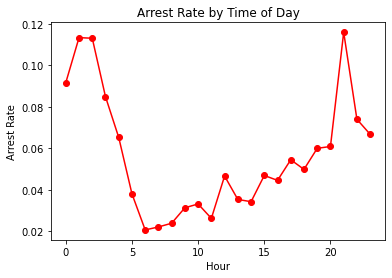

In [97]:
fig , ax = plt.subplots()
hourly_arrest_rate.plot(title = "Arrest Rate by Time of Day", marker = "o" , color = "r");  # Create a line plot of hourly_arrest_rate using the .plot() method.
ax.set_xlabel("Hour")
ax.set_ylabel("Arrest Rate")
plt.show()

# Plotting drug-related stops

In [98]:
ri.drugs_related_stop.value_counts(dropna=False)

False    47685
True       325
Name: drugs_related_stop, dtype: int64

In [99]:
#a = ri["stop_date"]
#ri["stop_date"] = ri.to_datetime(a)
annual_drug_rate = ri.groupby(ri.index.year)["drugs_related_stop"].mean()
annual_drug_rate

stop_datetime
2005    0.008038
2006    0.006257
Name: drugs_related_stop, dtype: float64

In [100]:
ri.drugs_related_stop.resample("A").mean()

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006257
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

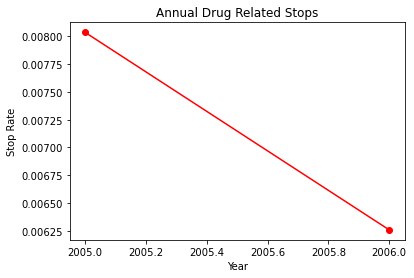

In [101]:
fig , ax = plt.subplots()
annual_drug_rate.plot(title = "Annual Drug Related Stops", marker = "o" , color = "r");  # Create a line plot of hourly_arrest_rate using the .plot() method.
ax.set_xlabel("Year")
ax.set_ylabel("Stop Rate")
plt.show()

# Comparing drug and search rates (to be deleted)

In [102]:
ri.drop(["state"], axis = 1, inplace = True) # removed columns that are not required


In [103]:
ri.head(3)

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,datetime,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,nan,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,False
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,nan,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00,False
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,nan,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00,False


In [104]:
annual_search_rate = ri.groupby(ri.index.year)["search_conducted"].mean()
annual_search_rate

stop_datetime
2005    0.050692
2006    0.038361
Name: search_conducted, dtype: float64

In [105]:
ri.search_conducted.resample("A").mean()

stop_datetime
2005-12-31    0.050692
2006-12-31    0.038361
Freq: A-DEC, Name: search_conducted, dtype: float64

In [106]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis = 1)
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005,0.008038,0.050692
2006,0.006257,0.038361


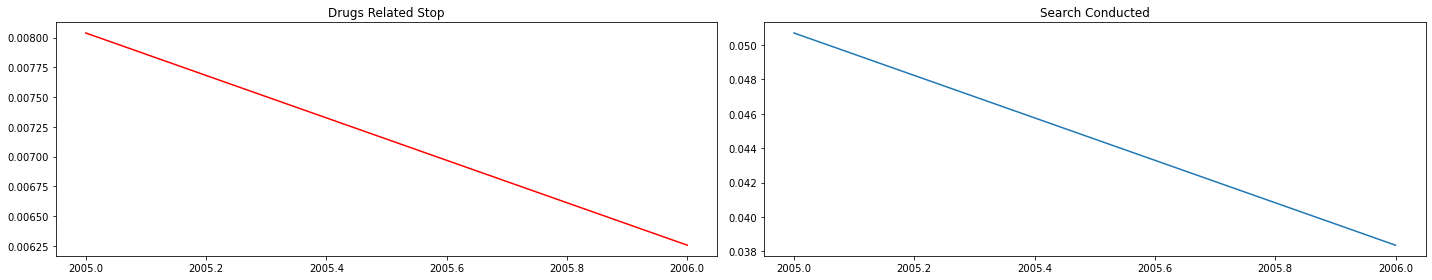

In [107]:
fig , ax = plt.subplots(1,2,figsize=(20,4))
ax[0].plot(annual.index, annual["drugs_related_stop"],"r")
ax[1].plot(annual.index, annual["search_conducted"])
ax[0].set_title("Drugs Related Stop")
ax[1].set_title("Search Conducted")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='stop_datetime'>

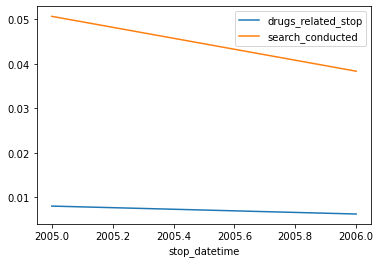

In [108]:
annual.plot()

# Tallying violations by district

In [109]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,datetime,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,nan,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,False
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,nan,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00,False
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,nan,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00,False
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,nan,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00,False
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,nan,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00,False


In [110]:
all_zones = pd.crosstab(ri["district"], ri["violation"]) # Create a frequency table from the district and violation columns using the pd.crosstab() function.
all_zones # Save the frequency table as a new object, all_zones.

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,276,517,69,52,5895
Zone K2,422,1220,156,256,7653
Zone K3,1083,1181,247,435,10608
Zone X1,93,643,44,9,1128
Zone X3,342,741,127,102,4148
Zone X4,806,2220,249,609,6679


In [111]:
k_zones = all_zones.loc["Zone K1":"Zone K3"]  # Select rows 'Zone K1' through 'Zone K3' from all_zones using the .loc[] accessor.
k_zones  # Save the smaller table as a new object, k_zones.

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,276,517,69,52,5895
Zone K2,422,1220,156,256,7653
Zone K3,1083,1181,247,435,10608


# Plotting violations by district

<AxesSubplot:xlabel='district'>

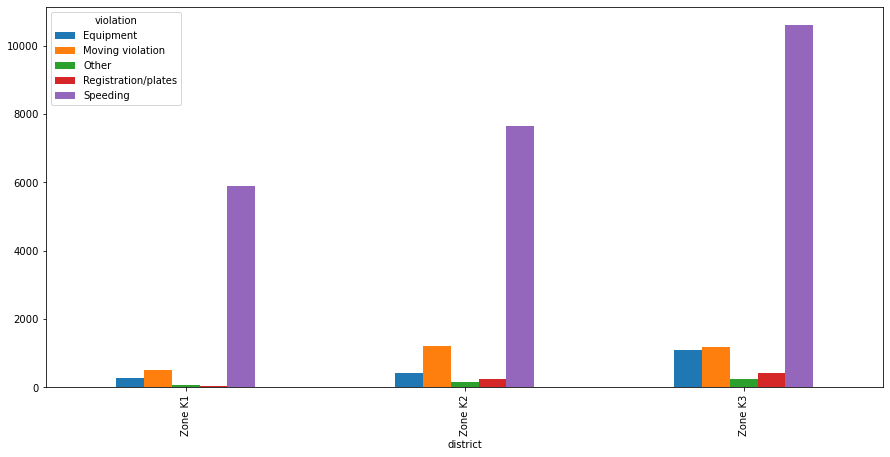

In [112]:
k_zones.plot.bar(figsize=(15,7))  # Create a bar plot of k_zones.

#### speeding is the most violation for each zones. K1 has fewer violation versus others.

<AxesSubplot:xlabel='district'>

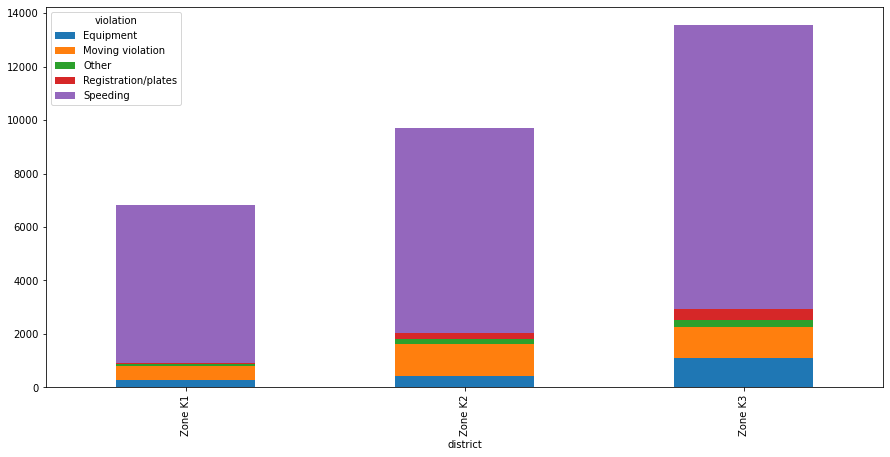

In [113]:
k_zones.plot.bar(stacked = True, figsize=(15,7))

#### total violation frq is raising through k1 to k3, k2 almost same moving violation as k3 and it means rate is more than k3.

# Converting stop durations to numbers

In [114]:
ri["stop_duration"].unique()  # Print the unique values in the stop_duration column.

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [115]:
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}   # reate a dictionary called mapping that maps the stop_duration strings to the integers specified above.

In [116]:
b = ri["stop_duration"].map(mapping) # instruction solution

In [117]:
def time_chg(x):
    """mapping the serie"""
    if x == '0-15 Min':
        return 8
    elif x == '16-30 Min':
        return 23
    else:
        return 45
        

In [118]:
ri["stop_duration"].value_counts()

0-15 Min     40662
16-30 Min     5672
30+ Min       1676
Name: stop_duration, dtype: int64

In [119]:
a = ri["stop_duration"].apply(lambda x: time_chg(x))  # my solution

In [120]:
ri["stop_minutes"] = a

In [121]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,datetime,frisk,stop_minutes
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,False,8
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00,False,23
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00,False,8
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00,False,8
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00,False,45


In [122]:
ri[["stop_minutes"]].value_counts()

stop_minutes
8               40662
23               5672
45               1676
dtype: int64

In [123]:
ri[["stop_minutes", "stop_duration"]].value_counts()

stop_minutes  stop_duration
8             0-15 Min         40662
23            16-30 Min         5672
45            30+ Min           1676
dtype: int64

In [124]:
ri[["stop_duration"]].value_counts()

stop_duration
0-15 Min         40662
16-30 Min         5672
30+ Min           1676
dtype: int64

# Plotting stop length

In [125]:
ri["violation_raw"].value_counts()

Speeding                            36111
Other Traffic Violation              6522
Equipment/Inspection Violation       3022
Registration Violation               1463
Call for Service                      475
Motorist Assist/Courtesy              176
Violation of City/Town Ordinance       78
Special Detail/Directed Patrol         72
APB                                    51
Suspicious Person                      28
Warrant                                12
Name: violation_raw, dtype: int64

In [126]:
stop_length = ri.groupby("violation_raw")["stop_minutes"].mean() 
# For each value in the violation_raw column, calculate the mean number of stop_minutes that a driver is detained.
stop_length 
# Save the resulting Series as a new object, stop_length.

violation_raw
APB                                 28.078431
Call for Service                    27.637895
Equipment/Inspection Violation      13.668101
Motorist Assist/Courtesy            15.528409
Other Traffic Violation             14.207298
Registration Violation              17.304170
Special Detail/Directed Patrol      30.902778
Speeding                             9.707181
Suspicious Person                   21.821429
Violation of City/Town Ordinance    11.153846
Warrant                             29.666667
Name: stop_minutes, dtype: float64

<AxesSubplot:ylabel='violation_raw'>

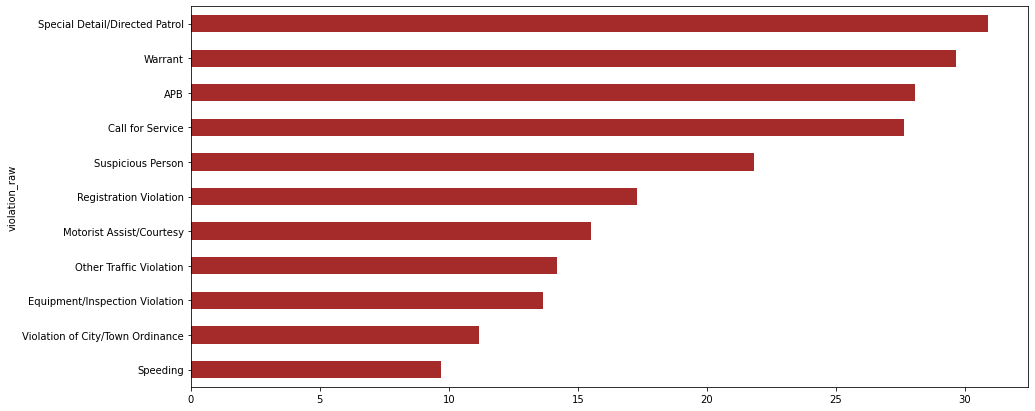

In [127]:
stop_length.sort_values().plot.barh(figsize=(15,7),color="brown")
# Sort stop_length by its values, and then visualize it using a horizontal bar plot.

# Plotting the temperature

In [128]:
weather = pd.read_csv("weather.csv")  # Read weather.csv into a DataFrame named weather

In [129]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  8022 non-null   object 
 1   DATE     8022 non-null   object 
 2   AWND     4017 non-null   float64
 3   TAVG     1217 non-null   float64
 4   TMAX     8005 non-null   float64
 5   TMIN     7996 non-null   float64
 6   WT01     1777 non-null   float64
 7   WT02     221 non-null    float64
 8   WT03     227 non-null    float64
 9   WT04     119 non-null    float64
 10  WT05     360 non-null    float64
 11  WT06     25 non-null     float64
 12  WT07     79 non-null     float64
 13  WT08     404 non-null    float64
 14  WT09     69 non-null     float64
 15  WT10     2 non-null      float64
 16  WT11     3 non-null      float64
 17  WT13     1175 non-null   float64
 18  WT14     575 non-null    float64
 19  WT15     6 non-null      float64
 20  WT16     1326 non-null   float64
 21  WT17     12 no

In [131]:
weather.isna().sum()

STATION       0
DATE          0
AWND       4005
TAVG       6805
TMAX         17
TMIN         26
WT01       6245
WT02       7801
WT03       7795
WT04       7903
WT05       7662
WT06       7997
WT07       7943
WT08       7618
WT09       7953
WT10       8020
WT11       8019
WT13       6847
WT14       7447
WT15       8016
WT16       6696
WT17       8010
WT18       7677
WT19       8018
WT21       8004
WT22       7990
dtype: int64

In [132]:
weather.dropna(how = "all", inplace=True)
weather.dropna(axis = 1, how = "all", inplace=True)
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
weather[["TMIN","TAVG","TMAX"]].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


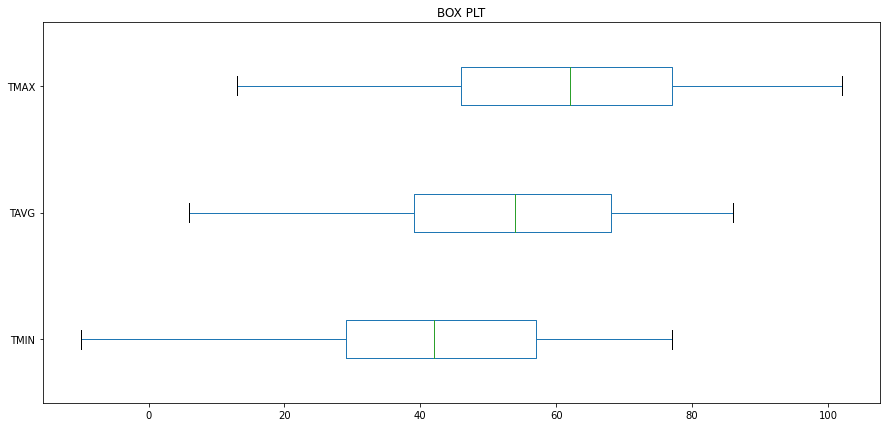

In [134]:
weather[["TMIN","TAVG","TMAX"]].plot.box(title = "BOX PLT", figsize = (15,7), vert =False)

plt.show()  # Create a box plot to visualize the temperature columns.

# Plotting the temperature difference

In [135]:
weather.TMAX.fillna(weather.TMAX.mean(),inplace = True) 
weather.TMAX.isnull().value_counts()
# Filling missing values with mean of column

False    8022
Name: TMAX, dtype: int64

In [136]:
weather.TMIN.fillna(weather.TMIN.mean(),inplace = True)
weather.TMIN.isnull().value_counts() 
# Filling missing values with mean of column

False    8022
Name: TMIN, dtype: int64

In [137]:
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]  
# Create a new column in the weather DataFrame named TDIFF
# that represents the difference between the maximum and minimum temperatures.

In [138]:
weather.TDIFF.isnull().value_counts()

False    8022
Name: TDIFF, dtype: int64

In [139]:
weather[["TMAX", "TMIN", "TDIFF"]]

,TMAX,TMIN,TDIFF
0,47.0,28.0,19.0
1,52.0,24.0,28.0
2,48.0,27.0,21.0
3,54.0,40.0,14.0
4,44.0,31.0,13.0
...,...,...,...
8017,61.0,44.0,17.0
8018,44.0,30.0,14.0
8019,40.0,28.0,12.0
8020,35.0,27.0,8.0


In [140]:
weather["TDIFF"].describe()  # Print the summary statistics for TDIFF using the .describe() method.

count    8022.000000
mean       19.147671
std         7.054431
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

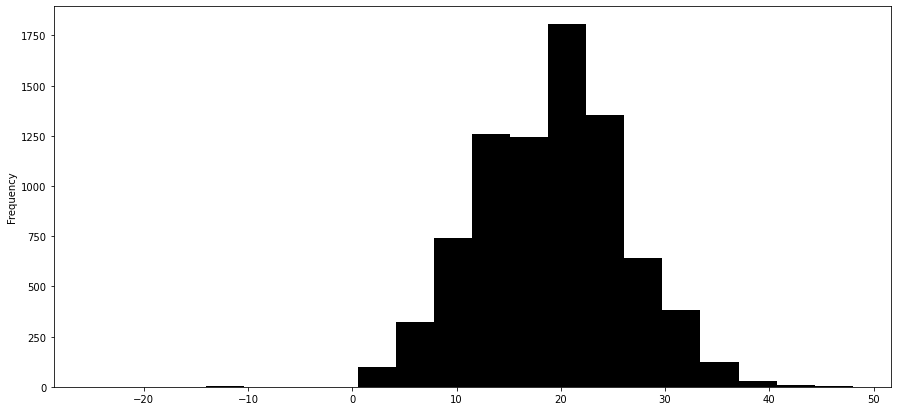

In [141]:
weather["TDIFF"].plot.hist(bins = 20, figsize = (15,7), color = "black")
plt.show()  # Create a histogram with 20 bins to visualize TDIFF.

<AxesSubplot:>

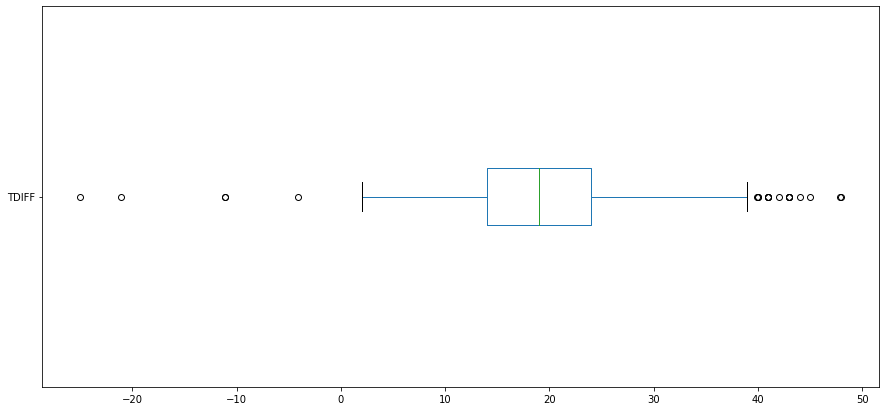

In [142]:
weather.TDIFF.plot.box(vert = False, figsize=(15,7))

# Counting bad weather conditions

In [143]:
WT = weather.loc[:,"WT01":"WT22"] 
# Copy the columns WT01 through WT22 from weather to a new DataFrame named WT.
WT.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8022 entries, 0 to 8021
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WT01    1777 non-null   float64
 1   WT02    221 non-null    float64
 2   WT03    227 non-null    float64
 3   WT04    119 non-null    float64
 4   WT05    360 non-null    float64
 5   WT06    25 non-null     float64
 6   WT07    79 non-null     float64
 7   WT08    404 non-null    float64
 8   WT09    69 non-null     float64
 9   WT10    2 non-null      float64
 10  WT11    3 non-null      float64
 11  WT13    1175 non-null   float64
 12  WT14    575 non-null    float64
 13  WT15    6 non-null      float64
 14  WT16    1326 non-null   float64
 15  WT17    12 non-null     float64
 16  WT18    345 non-null    float64
 17  WT19    4 non-null      float64
 18  WT21    18 non-null     float64
 19  WT22    32 non-null     float64
dtypes: float64(20)
memory usage: 1.3 MB


#### my solution for sum of rows

In [144]:
#Calculate the sum of each row in WT, and store the results in a new weather column named bad_conditions.
x = []
for i in WT.index:  
    a = WT.loc[i].sum()
    x.append(a)
bad_conditions = pd.Series(x)


#### built in func for sum 

In [145]:
# Calculate the sum of each row in WT, and store the results in a new weather column named bad_conditions.
bad_conditions =  WT.sum(axis=1)

In [146]:
WT["bad_conditions"] = bad_conditions.astype("int")
WT["bad_conditions"].value_counts()

0    5738
1     628
4     476
3     380
2     368
5     282
6     101
7      41
9       4
8       4
Name: bad_conditions, dtype: int64

In [147]:
WT.bad_conditions

0       0
1       0
2       0
3       0
4       0
       ..
8017    1
8018    0
8019    3
8020    2
8021    1
Name: bad_conditions, Length: 8022, dtype: int32

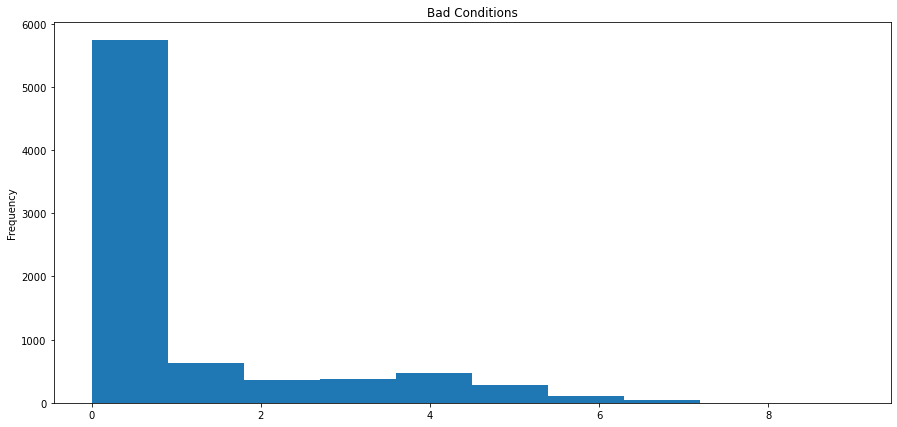

In [148]:
# Create a histogram to visualize bad_conditions, and then display the plot.
WT.bad_conditions.plot(title="Bad Conditions", kind = "hist",figsize=(15,7))
plt.show()

# Rating the weather conditions

In [149]:
# Count the unique values in the bad_conditions column and sort the index.
WT.bad_conditions.value_counts()

0    5738
1     628
4     476
3     380
2     368
5     282
6     101
7      41
9       4
8       4
Name: bad_conditions, dtype: int64

In [150]:
maping = dict()
for i in WT.bad_conditions.unique():
    if i == 0:
        maping[i] = "good"
    elif i > 0 and i < 5:
        maping[i] = "bad"
    else:
        maping[i] = "worse"

In [151]:
#Create a dictionary called mapping that maps the bad_conditions integers to strings 
#as specified above.

maping  

{0: 'good',
 1: 'bad',
 2: 'bad',
 3: 'bad',
 4: 'bad',
 9: 'worse',
 6: 'worse',
 8: 'worse',
 5: 'worse',
 7: 'worse'}

In [152]:
# Convert the bad_conditions integers to strings using the mapping and 
# store the results in a new column called rating.
rating = WT.bad_conditions.map(maping)
WT["rating"] = rating

In [153]:
# Count the unique values in rating to verify that the integers were properly converted to strings.
WT.rating.value_counts()  

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

# Changing the data type to category

In [154]:
WT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8022 entries, 0 to 8021
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WT01            1777 non-null   float64
 1   WT02            221 non-null    float64
 2   WT03            227 non-null    float64
 3   WT04            119 non-null    float64
 4   WT05            360 non-null    float64
 5   WT06            25 non-null     float64
 6   WT07            79 non-null     float64
 7   WT08            404 non-null    float64
 8   WT09            69 non-null     float64
 9   WT10            2 non-null      float64
 10  WT11            3 non-null      float64
 11  WT13            1175 non-null   float64
 12  WT14            575 non-null    float64
 13  WT15            6 non-null      float64
 14  WT16            1326 non-null   float64
 15  WT17            12 non-null     float64
 16  WT18            345 non-null    float64
 17  WT19            4 non-null      f

In [155]:
cats = ["good", "bad", "worse"]  
# Create a list object called cats that lists the weather ratings in a logical order: 'good', 'bad', 'worse'.

In [156]:
pd.Categorical(WT.rating, categories= cats, ordered = True)

['good', 'good', 'good', 'good', 'good', ..., 'bad', 'good', 'bad', 'bad', 'bad']
Length: 8022
Categories (3, object): ['good' < 'bad' < 'worse']

In [157]:
s = pd.Series(pd.Categorical(WT.rating, categories= cats, ordered = True))
s 

0       good
1       good
2       good
3       good
4       good
        ... 
8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Length: 8022, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [158]:
WT.rating = s  
#Change the data type of the rating column from object to category. Make sure to use the cats list to define the category ordering.

In [159]:
WT.rating.sort_values()

0        good
3832     good
3831     good
3830     good
3829     good
        ...  
4853    worse
4852    worse
4851    worse
4871    worse
4010    worse
Name: rating, Length: 8022, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [160]:
WT.rating.head()
# Examine the head of the rating column to confirm that the categories are logically ordered.

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [161]:
WT.rating.tail()

8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [162]:
WT.rating.max()

'worse'

In [163]:
WT.rating.min()

'good'

# Preparing the DataFrames

In [164]:
weather["rating"] = WT["rating"] # we add WT rating column to weather df
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8022 entries, 0 to 8021
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   STATION  8022 non-null   object  
 1   DATE     8022 non-null   object  
 2   AWND     4017 non-null   float64 
 3   TAVG     1217 non-null   float64 
 4   TMAX     8022 non-null   float64 
 5   TMIN     8022 non-null   float64 
 6   WT01     1777 non-null   float64 
 7   WT02     221 non-null    float64 
 8   WT03     227 non-null    float64 
 9   WT04     119 non-null    float64 
 10  WT05     360 non-null    float64 
 11  WT06     25 non-null     float64 
 12  WT07     79 non-null     float64 
 13  WT08     404 non-null    float64 
 14  WT09     69 non-null     float64 
 15  WT10     2 non-null      float64 
 16  WT11     3 non-null      float64 
 17  WT13     1175 non-null   float64 
 18  WT14     575 non-null    float64 
 19  WT15     6 non-null      float64 
 20  WT16     1326 non-null   float

In [165]:
ri.reset_index(inplace = True)  # Reset the index of the ri DataFrame.
ri.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,datetime,frisk,stop_minutes
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,False,8
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00,False,23
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00,False,8
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00,False,8
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00,False,45


In [166]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48010 entries, 0 to 48009
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_datetime       48010 non-null  datetime64[ns]
 1   id                  48010 non-null  object        
 2   stop_date           48010 non-null  object        
 3   stop_time           48010 non-null  object        
 4   location_raw        48010 non-null  object        
 5   police_department   48010 non-null  object        
 6   driver_gender       48010 non-null  object        
 7   driver_age_raw      48010 non-null  float64       
 8   driver_age          47778 non-null  float64       
 9   driver_race_raw     48010 non-null  object        
 10  driver_race         48010 non-null  object        
 11  violation_raw       48010 non-null  object        
 12  violation           48010 non-null  object        
 13  search_conducted    48010 non-null  bool      

In [167]:
weather_rating = weather[["DATE", "rating"]]
# Create a new DataFrame named weather_rating that contains only the DATE and rating columns from the weather DataFrame.

In [168]:
weather_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8022 entries, 0 to 8021
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   DATE    8022 non-null   object  
 1   rating  8022 non-null   category
dtypes: category(1), object(1)
memory usage: 453.3+ KB


In [169]:
weather_rating.head()
# Examine the head of weather_rating to verify that it contains the proper columns.

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [170]:
weather_rating.shape

(8022, 2)

In [171]:
weather_rating.nunique()

DATE      4017
rating       3
dtype: int64

# Merging the DataFrames

In [172]:

ri.head();
ri.shape

(48010, 26)

In [173]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48010 entries, 0 to 48009
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_datetime       48010 non-null  datetime64[ns]
 1   id                  48010 non-null  object        
 2   stop_date           48010 non-null  object        
 3   stop_time           48010 non-null  object        
 4   location_raw        48010 non-null  object        
 5   police_department   48010 non-null  object        
 6   driver_gender       48010 non-null  object        
 7   driver_age_raw      48010 non-null  float64       
 8   driver_age          47778 non-null  float64       
 9   driver_race_raw     48010 non-null  object        
 10  driver_race         48010 non-null  object        
 11  violation_raw       48010 non-null  object        
 12  violation           48010 non-null  object        
 13  search_conducted    48010 non-null  bool      

In [174]:
#st_date = ri["stop_date"]

In [175]:
#ri["stop_date"] = pd.to_datetime(st_date)

In [176]:
weather_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8022 entries, 0 to 8021
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   DATE    8022 non-null   object  
 1   rating  8022 non-null   category
dtypes: category(1), object(1)
memory usage: 453.3+ KB


In [177]:
#for_DATE = weather_rating["DATE"]

In [178]:
#weather_rating["DATE"] = pd.to_datetime(for_DATE)

In [179]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [180]:
type(weather_rating.DATE[0])

str

In [181]:
type(ri["stop_date"][0])

str

In [182]:
ri_weather = ri.merge(weather_rating, how = "left", left_on="stop_date", right_on="DATE") 

In [183]:
ri_weather.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,datetime,frisk,stop_minutes,DATE,rating
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,False,8,2005-01-02,good
1,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,False,8,2005-01-02,bad
2,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00,False,23,2005-01-02,good
3,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00,False,23,2005-01-02,bad
4,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00,False,8,2005-01-04,good


In [184]:
ri_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95877 entries, 0 to 95876
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_datetime       95877 non-null  datetime64[ns]
 1   id                  95877 non-null  object        
 2   stop_date           95877 non-null  object        
 3   stop_time           95877 non-null  object        
 4   location_raw        95877 non-null  object        
 5   police_department   95877 non-null  object        
 6   driver_gender       95877 non-null  object        
 7   driver_age_raw      95877 non-null  float64       
 8   driver_age          95413 non-null  float64       
 9   driver_race_raw     95877 non-null  object        
 10  driver_race         95877 non-null  object        
 11  violation_raw       95877 non-null  object        
 12  violation           95877 non-null  object        
 13  search_conducted    95877 non-null  bool      

In [185]:
ri_weather.shape

(95877, 28)

In [186]:
ri_weather.set_index("stop_datetime", inplace = True)


In [187]:
ri_weather.head(3)

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,datetime,frisk,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,False,8,2005-01-02,good
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00,False,8,2005-01-02,bad
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00,False,23,2005-01-02,good


# Comparing arrest rates by weather rating

In [188]:
ri_weather["is_arrested"].value_counts(normalize=True)  # First, you'll calculate the overall arrest rate.



False    0.948184
True     0.051816
Name: is_arrested, dtype: float64

In [189]:
ri_weather["is_arrested"].mean()  # First, you'll calculate the overall arrest rate.

0.05181638974936638

In [190]:
ri_weather.groupby("rating")["is_arrested"].mean()
# Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.

rating
good     0.051263
bad      0.051462
worse    0.062559
Name: is_arrested, dtype: float64

In [191]:
aresrate_serie = ri_weather.groupby(by = ["violation", "rating"])["is_arrested"].mean()
# Finally, you'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

In [192]:
ri_weather.groupby(by = ["violation", "rating"])["is_arrested"].value_counts().xs(True, level="is_arrested")

violation            rating
Equipment            good       492
                     bad        207
                     worse       48
Moving violation     good      1002
                     bad        416
                     worse       89
Other                good       330
                     bad        138
                     worse       26
Registration/plates  good       393
                     bad        168
                     worse       23
Speeding             good      1140
                     bad        417
                     worse       79
Name: is_arrested, dtype: int64

# Selecting From a mult-indexed Series

In [193]:
aresrate_serie.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168


In [194]:
ri_weather.pivot_table(values = "is_arrested" , index="violation", columns= "rating")

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168
